In [1]:
#importing required packages
import pandas as pd
import numpy as np
import torch as t
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
np.random.seed(8)
from sklearn.preprocessing import LabelEncoder
import time
import seaborn as sns

In [2]:
#Changing the default values of the below display settings to view the whole data clearly
pd.options.display.max_columns = 50
pd.options.display.max_rows = 5000
pd.options.display.float_format = '{:.2f}'.format

In [3]:
#Reading the csv
df = pd.read_csv('dataset.csv')

In [4]:
#This info function shows that the dataset have 4424 rows and 35 columns,where 34 are input feature 
# and 35th 'Target' is the categorical output. There are no missing values found.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,1.18,6.89,1.73,9.90,0.89,2.53,1.25,12.32,16.46,7.32,7.82,0.55,0.01,0.11,0.88,0.35,0.25,23.27,0.02,0.71,6.27,8.30,4.71,10.64,0.14,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,0.00
std,0.61,5.30,1.31,4.33,0.31,3.96,1.75,9.03,11.04,4.00,4.86,0.50,0.11,0.32,0.32,0.48,0.43,7.59,0.16,2.36,2.48,4.18,3.09,4.84,0.69,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27
min,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06
25%,1.00,1.00,1.00,6.00,1.00,1.00,1.00,2.00,3.00,5.00,5.00,0.00,0.00,0.00,1.00,0.00,0.00,19.00,0.00,0.00,5.00,6.00,3.00,11.00,0.00,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70
50%,1.00,8.00,1.00,10.00,1.00,1.00,1.00,13.00,14.00,6.00,8.00,1.00,0.00,0.00,1.00,0.00,0.00,20.00,0.00,0.00,6.00,8.00,5.00,12.29,0.00,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,0.32
75%,1.00,12.00,2.00,13.00,1.00,1.00,1.00,22.00,27.00,10.00,10.00,1.00,0.00,0.00,1.00,1.00,0.00,25.00,0.00,0.00,7.00,10.00,6.00,13.40,0.00,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79
max,6.00,18.00,9.00,17.00,1.00,17.00,21.00,29.00,34.00,32.00,46.00,1.00,1.00,1.00,1.00,1.00,1.00,70.00,1.00,20.00,26.00,45.00,26.00,18.88,12.00,19.00,23.00,33.00,20.00,18.57,12.00,16.20,3.70,3.51


(array([1421.,    0.,    0.,    0.,    0., 2209.,    0.,    0.,    0.,
         794.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

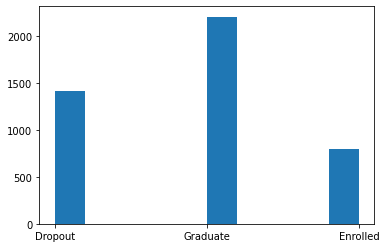

In [6]:
#distribution of the output classes
plt.hist(df['Target'])

In [7]:
#No duplicates found.
df[df.duplicated()].count()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

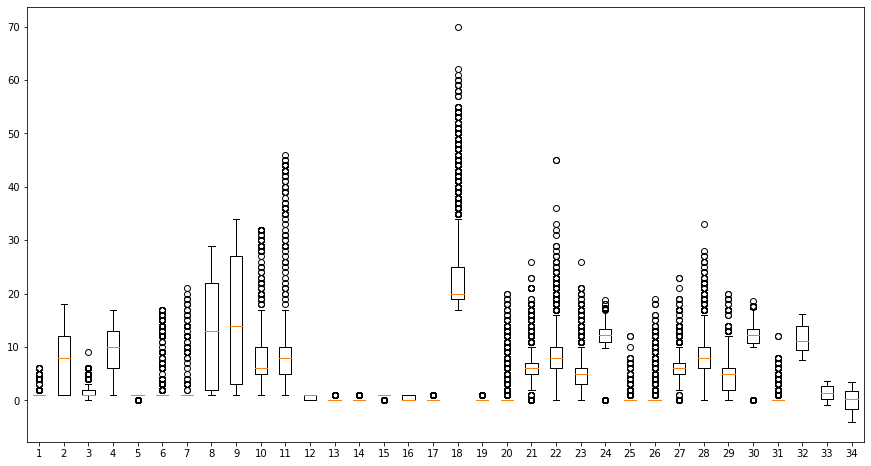

In [8]:
#This figure shows the range of all the input features.
fig = plt.figure(figsize =(15, 8))
plt.boxplot(df[df.columns[0:34]])
plt.show()

In [9]:
#A MinMaxScaler to normalize the data by scaling.
scaler = pp.MinMaxScaler()  
scaled_df = scaler.fit_transform(df[df.columns[0:34]]) 


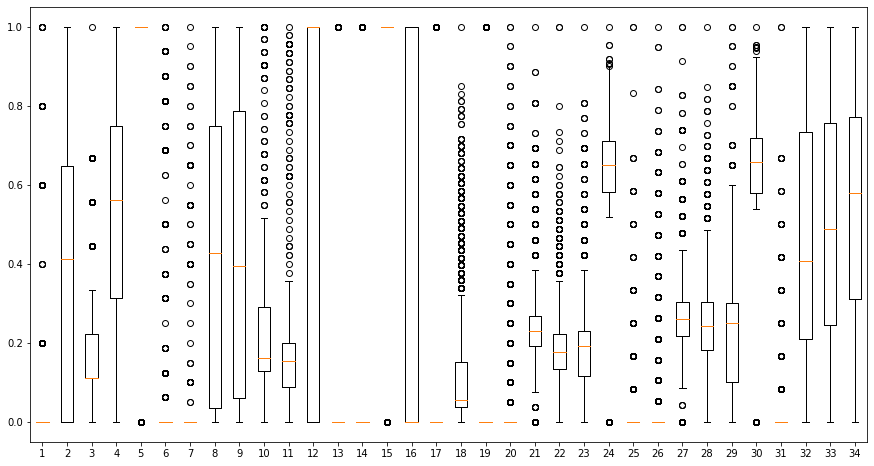

In [10]:
#Range of input features after scaling.
fig = plt.figure(figsize =(15, 8))
plt.boxplot(scaled_df)
plt.show()

In [11]:
## Matlab requires the 'Target' to be in one hot encoding format
#so we are changing this file and saving it in csv:'scaled_df.csv' , to use it in matlab,
'''
matlab_data = pd.DataFrame(scaled_df)
y_matlab = pd.get_dummies(df['Target'])
matlab_data['34'] = y_matlab['Dropout']
matlab_data['35'] = y_matlab['Enrolled']
matlab_data['36'] = y_matlab['Graduate']
matlab_data.to_csv('scaled_df.csv', index= False)
'''

"\nmatlab_data = pd.DataFrame(scaled_df)\ny_matlab = pd.get_dummies(df['Target'])\nmatlab_data['34'] = y_matlab['Dropout']\nmatlab_data['35'] = y_matlab['Enrolled']\nmatlab_data['36'] = y_matlab['Graduate']\nmatlab_data.to_csv('scaled_df.csv', index= False)\n"

In [12]:
#This object is used to encode the target variable into numeric labels
le = LabelEncoder() 
y = le.fit_transform(df['Target']) 

In [13]:
x = scaled_df

In [14]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=50)

In [15]:
#Input values are converted into Float Tensor
#Output values are converted into Long tensor
x_train = t.FloatTensor(x_train)
y_train = t.LongTensor(y_train)

x_test = t.FloatTensor(x_test)
y_test = t.LongTensor(y_test)

x_val = t.FloatTensor(x_val)
y_val = t.LongTensor(y_val)

In [16]:
#defining class defination of the perceptron
class SimpleNN(t.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = t.nn.Linear(34,10)
        self.fc2 = t.nn.Linear(10,3)
        self.activation1 = t.nn.Sigmoid()
        #self.activation2 = t.nn.Softmax(dim=1), Since we have used CrossEntropyLoss function it 
        #by default applies Softmax function in the output layer
        
    def forward(self, x):
        hidden = self.fc1(x)
        hidden = self.activation1(hidden)
        
        output = self.fc2(hidden)
        return output

In [17]:
#Function for calculating the accuracy
def accuracy(pred_output, actual_output):
    out_compare = t.eq(t.argmax(pred_output, dim = 1), actual_output)

    acc = (t.count_nonzero(out_compare) / actual_output.shape[0]) * 100
   
    return float(acc)

In [18]:
model = SimpleNN()

In [19]:
model.eval()

SimpleNN(
  (fc1): Linear(in_features=34, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=3, bias=True)
  (activation1): Sigmoid()
)

In [20]:
#print(list(model.parameters()))

In [21]:
#Calculating test loss before training 
y_pred = model(x_test)
criterion2 = t.nn.CrossEntropyLoss()
before_train = criterion2(y_pred, y_test)
print('Test loss before training' , before_train.item())

Test loss before training 1.2474071979522705


In [22]:
#Adam performed better than SGD for our dataset.
optimizer = t.optim.Adam(model.parameters(), lr = 0.01)

In [23]:
num_epochs = 500

In [24]:
ls_train_loss = []
ls_train_acc = []
ls_val_loss = []
ls_val_acc = []
ls_epoch = []
#calculating the start time of the training
start_time = time.time()


for epoch in range(num_epochs):
    ls_epoch.append(epoch)
    
    #training the model using train dataset
    output_train = model(x_train)
    loss = criterion2(output_train, y_train)
    ls_train_loss.append(loss.item())
    train_acc = accuracy(output_train, y_train)
    ls_train_acc.append(train_acc)
    
    #validating the model using the validation dataset
    output_val = model(x_val)
    val_loss = criterion2(output_val, y_val)
    val_acc = accuracy(output_val, y_val)
    ls_val_loss.append(val_loss.item())
    ls_val_acc.append(val_acc)
    

    
    print("Epoch ", epoch , ": train_loss:", loss.item(), "train_acc: ", train_acc, "val_loss: ", val_loss.item(), "val_acc: ", val_acc)
    #resetting the parameters after previous step
    optimizer.zero_grad() 
    #to calculate weights and bias through back propagation
    loss.backward()
    #to update the weights and bias
    optimizer.step()
    
end_time = time.time()
elapsed_time = end_time - start_time

Epoch  0 : train_loss: 1.2773499488830566 train_acc:  31.085153579711914 val_loss:  1.265750527381897 val_acc:  32.429378509521484
Epoch  1 : train_loss: 1.219462513923645 train_acc:  31.085153579711914 val_loss:  1.2093358039855957 val_acc:  32.429378509521484
Epoch  2 : train_loss: 1.1700026988983154 train_acc:  31.085153579711914 val_loss:  1.1612622737884521 val_acc:  32.429378509521484
Epoch  3 : train_loss: 1.1286402940750122 train_acc:  31.085153579711914 val_loss:  1.1211915016174316 val_acc:  32.429378509521484
Epoch  4 : train_loss: 1.0947710275650024 train_acc:  31.085153579711914 val_loss:  1.0885252952575684 val_acc:  32.429378509521484
Epoch  5 : train_loss: 1.0676867961883545 train_acc:  31.160512924194336 val_loss:  1.0625571012496948 val_acc:  32.429378509521484
Epoch  6 : train_loss: 1.0466381311416626 train_acc:  51.469482421875 val_loss:  1.0425411462783813 val_acc:  53.2203369140625
Epoch  7 : train_loss: 1.0308536291122437 train_acc:  55.12434387207031 val_loss:  

Epoch  130 : train_loss: 0.7075631618499756 train_acc:  70.76111602783203 val_loss:  0.6786882281303406 val_acc:  72.99435424804688
Epoch  131 : train_loss: 0.7062341570854187 train_acc:  70.87415313720703 val_loss:  0.6773871183395386 val_acc:  73.10734558105469
Epoch  132 : train_loss: 0.7049193382263184 train_acc:  70.94951629638672 val_loss:  0.6760969161987305 val_acc:  73.10734558105469
Epoch  133 : train_loss: 0.7036187052726746 train_acc:  70.94951629638672 val_loss:  0.674818217754364 val_acc:  73.33333587646484
Epoch  134 : train_loss: 0.7023321390151978 train_acc:  71.02487182617188 val_loss:  0.6735522150993347 val_acc:  73.44632720947266
Epoch  135 : train_loss: 0.7010594606399536 train_acc:  71.06254577636719 val_loss:  0.6723009943962097 val_acc:  73.55931854248047
Epoch  136 : train_loss: 0.6998003721237183 train_acc:  71.06254577636719 val_loss:  0.6710659861564636 val_acc:  73.55931854248047
Epoch  137 : train_loss: 0.6985548734664917 train_acc:  71.06254577636719 val

Epoch  199 : train_loss: 0.6417725086212158 train_acc:  73.09721374511719 val_loss:  0.6170836091041565 val_acc:  75.93220520019531
Epoch  200 : train_loss: 0.6410905718803406 train_acc:  73.17256927490234 val_loss:  0.6164613366127014 val_acc:  76.04519653320312
Epoch  201 : train_loss: 0.6404135823249817 train_acc:  73.28560638427734 val_loss:  0.6158437132835388 val_acc:  76.15818786621094
Epoch  202 : train_loss: 0.6397413611412048 train_acc:  73.28560638427734 val_loss:  0.6152305603027344 val_acc:  76.15818786621094
Epoch  203 : train_loss: 0.6390739679336548 train_acc:  73.32328796386719 val_loss:  0.614621639251709 val_acc:  76.15818786621094
Epoch  204 : train_loss: 0.6384111642837524 train_acc:  73.3609619140625 val_loss:  0.614016592502594 val_acc:  76.27118682861328
Epoch  205 : train_loss: 0.6377530097961426 train_acc:  73.39864349365234 val_loss:  0.6134153604507446 val_acc:  76.27118682861328
Epoch  206 : train_loss: 0.6370994448661804 train_acc:  73.51168060302734 val_l

Epoch  268 : train_loss: 0.6039968729019165 train_acc:  74.8304443359375 val_loss:  0.582821786403656 val_acc:  77.62711334228516
Epoch  269 : train_loss: 0.6035720109939575 train_acc:  74.86812591552734 val_loss:  0.5824383497238159 val_acc:  77.62711334228516
Epoch  270 : train_loss: 0.6031505465507507 train_acc:  74.90579986572266 val_loss:  0.5820580124855042 val_acc:  77.62711334228516
Epoch  271 : train_loss: 0.6027321815490723 train_acc:  74.98115539550781 val_loss:  0.5816804766654968 val_acc:  77.62711334228516
Epoch  272 : train_loss: 0.602317214012146 train_acc:  75.0565185546875 val_loss:  0.5813062191009521 val_acc:  77.62711334228516
Epoch  273 : train_loss: 0.6019054651260376 train_acc:  75.01884460449219 val_loss:  0.5809348821640015 val_acc:  77.62711334228516
Epoch  274 : train_loss: 0.6014969348907471 train_acc:  74.98115539550781 val_loss:  0.5805665850639343 val_acc:  77.85310363769531
Epoch  275 : train_loss: 0.6010916233062744 train_acc:  74.9434814453125 val_los

Epoch  347 : train_loss: 0.5787205696105957 train_acc:  76.33760833740234 val_loss:  0.560385525226593 val_acc:  78.30508422851562
Epoch  348 : train_loss: 0.5784756541252136 train_acc:  76.37528228759766 val_loss:  0.5601658821105957 val_acc:  78.30508422851562
Epoch  349 : train_loss: 0.5782320499420166 train_acc:  76.37528228759766 val_loss:  0.5599475502967834 val_acc:  78.30508422851562
Epoch  350 : train_loss: 0.5779895186424255 train_acc:  76.37528228759766 val_loss:  0.5597304105758667 val_acc:  78.41808319091797
Epoch  351 : train_loss: 0.5777482390403748 train_acc:  76.37528228759766 val_loss:  0.5595144033432007 val_acc:  78.41808319091797
Epoch  352 : train_loss: 0.5775079727172852 train_acc:  76.37528228759766 val_loss:  0.5592997670173645 val_acc:  78.41808319091797
Epoch  353 : train_loss: 0.5772689580917358 train_acc:  76.37528228759766 val_loss:  0.5590864419937134 val_acc:  78.41808319091797
Epoch  354 : train_loss: 0.5770310759544373 train_acc:  76.37528228759766 val

Epoch  425 : train_loss: 0.5624505281448364 train_acc:  76.4129638671875 val_loss:  0.5479117035865784 val_acc:  78.53107452392578
Epoch  426 : train_loss: 0.562267005443573 train_acc:  76.4129638671875 val_loss:  0.547808825969696 val_acc:  78.53107452392578
Epoch  427 : train_loss: 0.5620837211608887 train_acc:  76.5260009765625 val_loss:  0.5477070212364197 val_acc:  78.53107452392578
Epoch  428 : train_loss: 0.5619008541107178 train_acc:  76.5260009765625 val_loss:  0.5476064682006836 val_acc:  78.53107452392578
Epoch  429 : train_loss: 0.5617183446884155 train_acc:  76.56368255615234 val_loss:  0.5475072264671326 val_acc:  78.53107452392578
Epoch  430 : train_loss: 0.5615362524986267 train_acc:  76.60135650634766 val_loss:  0.547409176826477 val_acc:  78.53107452392578
Epoch  431 : train_loss: 0.5613543391227722 train_acc:  76.56368255615234 val_loss:  0.5473122596740723 val_acc:  78.53107452392578
Epoch  432 : train_loss: 0.5611728429794312 train_acc:  76.5260009765625 val_loss: 

In [25]:
print(f"Total time taken to train the model: {elapsed_time} seconds")

Total time taken to train the model: 1.3920462131500244 seconds


In [26]:
#print(list(model.parameters()))

In [27]:
#calculating Test loss after training
y_pred = model(x_test)
after_train = criterion2(y_pred, y_test)
print('Test loss after training' , after_train.item())

Test loss after training 0.5746737718582153


In [28]:
test_acc = accuracy(y_pred, y_test)
print("Testing accuracy: ", test_acc)

Testing accuracy:  76.7231674194336


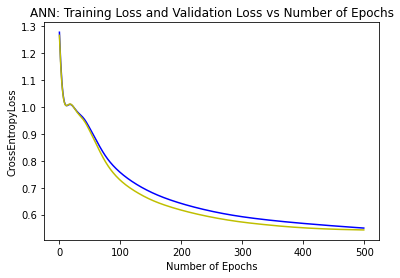

In [29]:
plt.plot(ls_epoch,ls_train_loss,'b')
plt.plot(ls_epoch,ls_val_loss,'y')
plt.xlabel("Number of Epochs")
plt.ylabel("CrossEntropyLoss")
plt.title("ANN: Training Loss and Validation Loss vs Number of Epochs")
plt.show()

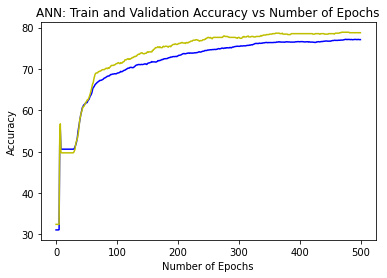

In [30]:
plt.plot(ls_epoch,ls_train_acc, 'b')
plt.plot(ls_epoch,ls_val_acc,'y')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("ANN: Train and Validation Accuracy vs Number of Epochs")
plt.show()

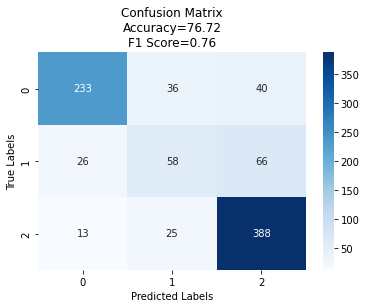

In [31]:
def f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted')

y_pred = model(x_test)
y_pred_labels = np.argmax(y_pred.detach().numpy(), axis=1)
y_test_labels = y_test.detach().numpy()
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1(y_test_labels, y_pred_labels)

# Plot the confusion matrix 
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')

# Add labels and metrics to the plot
plt.title('Confusion Matrix\nAccuracy={:.2f}\nF1 Score={:.2f}'.format(accuracy*100, f1))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


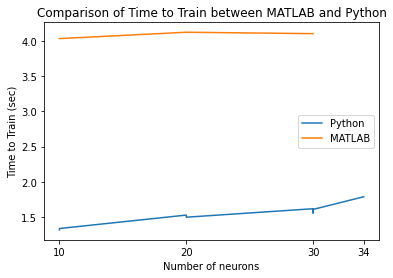

In [32]:
# Data for Python time to train
neurons_py = [10, 10, 20, 20, 20, 30, 30, 30, 34]
#lr_py = [0.001, 0.01,  0.001, 0.05, 0.01, 0.01, 0.1, 0.2, 0.05]
time_py = [1.32, 1.34, 1.53, 1.50, 1.50, 1.62, 1.56, 1.61, 1.79]

# Data for Matlab time to train
neurons_matlab = [10, 20, 30]
#lr_matlab = ['Optimized'] * 3
time_matlab = [4.03, 4.12, 4.10]

# Plotting the graph
fig, ax = plt.subplots()
ax.plot(neurons_py, time_py, label='Python')
ax.plot(neurons_matlab, time_matlab, label='MATLAB')
ax.set_xlabel('Number of neurons')
ax.set_ylabel('Time to Train (sec)')
ax.set_title('Comparison of Time to Train between MATLAB and Python')
ax.legend()

# Set the tick labels for x-axis
ticks = np.unique(neurons_py + neurons_matlab)
ax.set_xticks(ticks)

plt.show()

